In [1]:
library(XLConnect)
library(tidyverse)
library(ggpubr)

Loading required package: XLConnectJars
XLConnect 0.2-15 by Mirai Solutions GmbH [aut],
  Martin Studer [cre],
  The Apache Software Foundation [ctb, cph] (Apache POI),
  Graph Builder [ctb, cph] (Curvesapi Java library)
http://www.mirai-solutions.com
https://github.com/miraisolutions/xlconnect
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: magrittr

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract



In [2]:

remove_x_axes <- theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

remove_y_axes <- theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())


In [3]:
wb <- loadWorkbook('../data/go_top100updown.xlsx')

In [4]:
up100process <- readWorksheet(wb, sheet = 1) 
up100molecular <- readWorksheet(wb, sheet = 2)
up100cellular <- readWorksheet(wb, sheet = 3)
down100process <- readWorksheet(wb, sheet = 4)
down100molecular <- readWorksheet(wb, sheet = 5)
down100cellular <- readWorksheet(wb, sheet = 6)

In [5]:
up100process$type <- 'UP_PROCESS'
up100molecular$type <- 'UP_MOLECULAR'
up100cellular$type <- 'UP_CELLULAR'
down100process$type <- 'DOWN_PROCESS'
down100molecular$type <- 'DOWN_MOLECULAR'
down100cellular$type <- 'DOWN_CELLULAR'

In [6]:
process <- rbind(up100process, down100process)
molecular <- rbind(up100molecular, down100molecular)
cellular <- rbind(up100cellular, down100cellular)

Warning message in if (params$x != 0) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (params$x != 0) {:
"the condition has length > 1 and only the first element will be used"

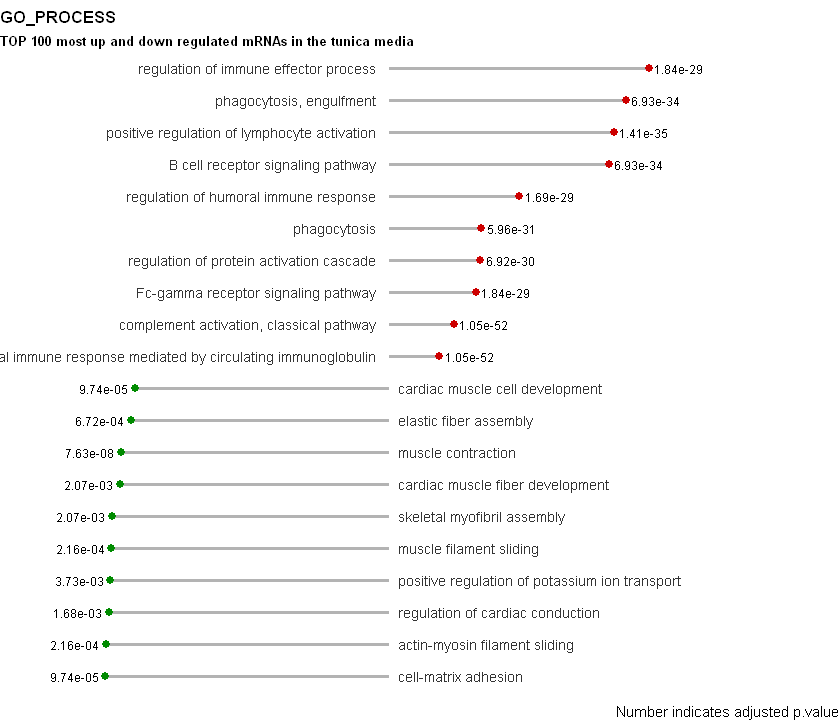

In [7]:
options(repr.plot.width=7, repr.plot.height=6)
process  %>% 
    mutate(Name = fct_reorder(Name, Combined.score))  %>% 
    ggplot(aes(x=Combined.score, y = Name)) +
        geom_segment(aes(x=115, y = Name, xend = Combined.score, yend = Name), color ='gray70', size = 1) +
        geom_point(aes(color = Combined.score < 100), size = 2) +
       geom_text(aes(label = format(Adjusted.p.value, digits =3)),
                 nudge_x = ifelse(process$Combined.score < 115, -10,10),
                 size = 2.5) +
        geom_text(aes(label = Name, x = 115),
                  size=3, 
                  nudge_x = ifelse(process$Combined.score < 115, 3,-3),
                  hjust = ifelse(process$Combined.score < 115, 0,1),
                  color = 'gray20') +
        scale_color_manual(values=c('red3', 'green4')) +
        labs(title = 'GO_PROCESS',
             subtitle = 'TOP 100 most up and down regulated mRNAs in the tunica media',
             x = 'Fold Change (log2)',
             caption = 'Number indicates adjusted p.value') +
        guides(col = FALSE) +
        xlim(0,250)+
        theme_void()+
        remove_y_axes +
        theme(plot.title = element_text(size = 10, face = 'bold'),
             plot.subtitle = element_text(size = 8, face = 'bold'))

Warning message in if (params$x != 0) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (params$x != 0) {:
"the condition has length > 1 and only the first element will be used"

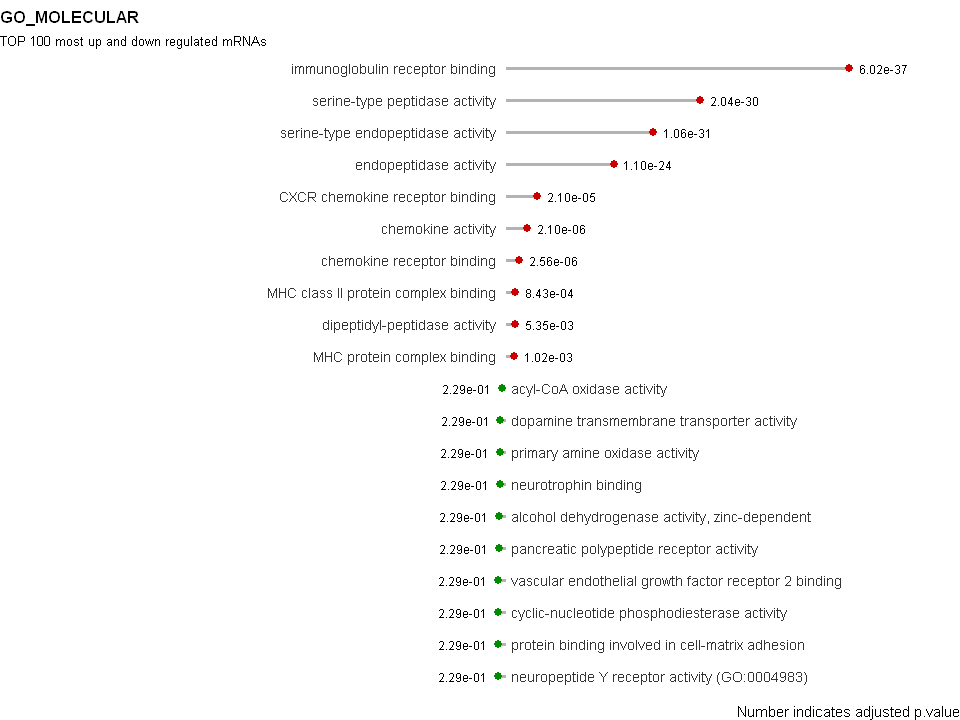

In [116]:
options(repr.plot.width=8, repr.plot.height=6)
molecular  %>% 
    mutate(Name = fct_reorder(Name, Combined.score))  %>% 
    ggplot(aes(x=Combined.score, y = Name)) +
        geom_segment(aes(x=15, y = Name, xend = Combined.score, yend = Name), color ='gray70', size = 1) +
        geom_point(aes(color = Combined.score < 15), size = 2) +
        geom_text(aes(label = format(Adjusted.p.value, digits =3)),
                 nudge_x = ifelse(molecular$Combined.score < 15, -20,20),
                 size = 2.5) +
        geom_text(aes(label = Name, x = 15),
                  size=3, 
                  nudge_x = ifelse(molecular$Combined.score < 15, 3,-3),
                  hjust = ifelse(molecular$Combined.score < 15, 0,1),
                  color = 'gray20') +
        scale_color_manual(values=c('red3', 'green4')) +
        labs(title = 'GO_MOLECULAR',
             subtitle = 'TOP 100 most up and down regulated mRNAs',
             x = 'Fold Change (log2)',
             caption = 'Number indicates adjusted p.value') +
        guides(col = FALSE) +
        xlim(-250,250)+
        theme_void()+
        remove_y_axes +
        theme(plot.title = element_text(size = 10, face = 'bold'),
             plot.subtitle = element_text(size = 8))

Warning message in if (params$x != 0) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (params$x != 0) {:
"the condition has length > 1 and only the first element will be used"

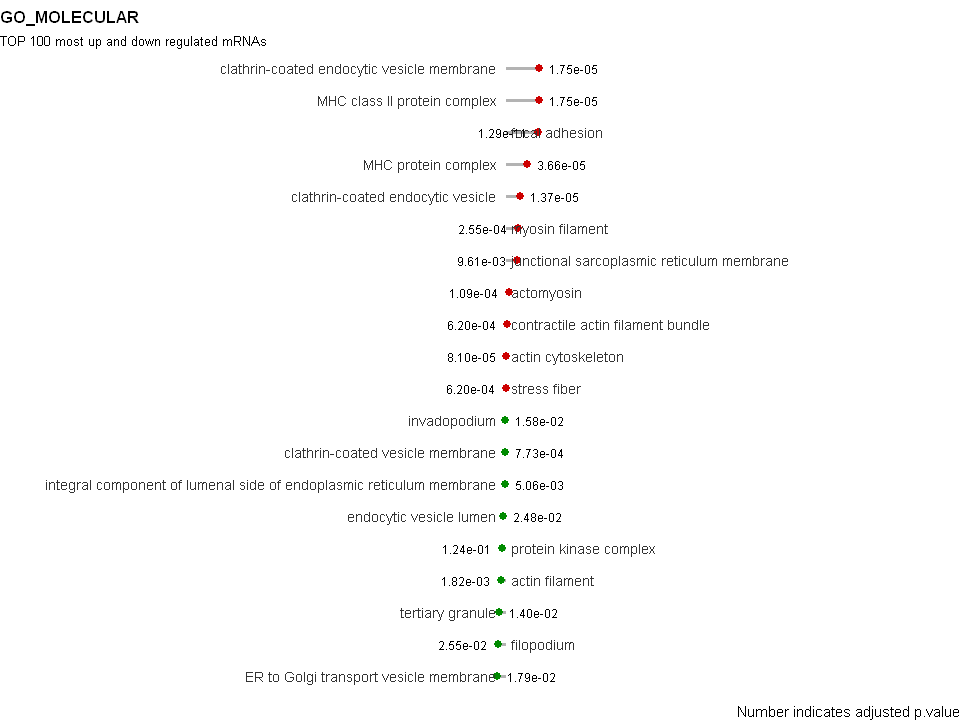

In [119]:
options(repr.plot.width=8, repr.plot.height=6)
cellular  %>% 
    mutate(Name = fct_reorder(Name, Combined.score))  %>% 
    ggplot(aes(x=Combined.score, y = Name)) +
        geom_segment(aes(x=15, y = Name, xend = Combined.score, yend = Name), color ='gray70', size = 1) +
        geom_point(aes(color = Combined.score < 15), size = 2) +
        geom_text(aes(label = format(Adjusted.p.value, digits =3)),
                 nudge_x = ifelse(molecular$Combined.score < 15, -20,20),
                 size = 2.5) +
        geom_text(aes(label = Name, x = 15),
                  size=3, 
                  nudge_x = ifelse(molecular$Combined.score < 15, 3,-3),
                  hjust = ifelse(molecular$Combined.score < 15, 0,1),
                  color = 'gray20') +
        scale_color_manual(values=c('red3', 'green4')) +
        labs(title = 'GO_MOLECULAR',
             subtitle = 'TOP 100 most up and down regulated mRNAs',
             x = 'Fold Change (log2)',
             caption = 'Number indicates adjusted p.value') +
        guides(col = FALSE) +
        xlim(-250,250)+
        theme_void()+
        remove_y_axes +
        theme(plot.title = element_text(size = 10, face = 'bold'),
             plot.subtitle = element_text(size = 8))

In [121]:
dim()

ERROR: Error in eval(expr, envir, enclos): object 'features' not found
